In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv('C:\\Users\\asaia\\OneDrive\\Desktop\\Task-2\\Unemployment in India.csv')
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [6]:
df.columns = df.columns.str.strip()

In [7]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

C:\Users\asaia\AppData\Local\Temp\ipykernel_3132\2263964175.py:1: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [21]:
df.shape

(740, 33)

In [22]:
df.columns

Index(['Date', 'Estimated Unemployment Rate (%)', 'Estimated Employed',
       'Estimated Labour Participation Rate (%)', 'Region_Assam',
       'Region_Bihar', 'Region_Chandigarh', 'Region_Chhattisgarh',
       'Region_Delhi', 'Region_Goa', 'Region_Gujarat', 'Region_Haryana',
       'Region_Himachal Pradesh', 'Region_Jammu & Kashmir', 'Region_Jharkhand',
       'Region_Karnataka', 'Region_Kerala', 'Region_Madhya Pradesh',
       'Region_Maharashtra', 'Region_Meghalaya', 'Region_Odisha',
       'Region_Puducherry', 'Region_Punjab', 'Region_Rajasthan',
       'Region_Sikkim', 'Region_Tamil Nadu', 'Region_Telangana',
       'Region_Tripura', 'Region_Uttar Pradesh', 'Region_Uttarakhand',
       'Region_West Bengal', 'Area_Urban', 'Frequency_Monthly'],
      dtype='object')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 33 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Date                                     740 non-null    datetime64[ns]
 1   Estimated Unemployment Rate (%)          740 non-null    float64       
 2   Estimated Employed                       740 non-null    float64       
 3   Estimated Labour Participation Rate (%)  740 non-null    float64       
 4   Region_Assam                             740 non-null    bool          
 5   Region_Bihar                             740 non-null    bool          
 6   Region_Chandigarh                        740 non-null    bool          
 7   Region_Chhattisgarh                      740 non-null    bool          
 8   Region_Delhi                             740 non-null    bool          
 9   Region_Goa                               740 non

In [25]:
df.isnull().sum()

Date                                       0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Region_Assam                               0
Region_Bihar                               0
Region_Chandigarh                          0
Region_Chhattisgarh                        0
Region_Delhi                               0
Region_Goa                                 0
Region_Gujarat                             0
Region_Haryana                             0
Region_Himachal Pradesh                    0
Region_Jammu & Kashmir                     0
Region_Jharkhand                           0
Region_Karnataka                           0
Region_Kerala                              0
Region_Madhya Pradesh                      0
Region_Maharashtra                         0
Region_Meghalaya                           0
Region_Odisha                              0
Region_Puducherry                          0
Region_Pun

In [26]:
df['Estimated Unemployment Rate (%)'].value_counts()

Estimated Unemployment Rate (%)
0.00     11
3.31      4
12.50     3
5.45      3
6.67      3
         ..
13.70     1
4.03      1
40.59     1
3.69      1
9.86      1
Name: count, Length: 624, dtype: int64

In [27]:
df.describe()

,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740,740.000000,7.400000e+02,740.000000
mean,2019-12-12 18:36:58.378378496,11.787946,7.204460e+06,42.630122
min,2019-05-31 00:00:00,0.000000,4.942000e+04,13.330000
25%,2019-08-31 00:00:00,4.657500,1.190404e+06,38.062500
50%,2019-11-30 00:00:00,8.350000,4.744178e+06,41.160000
75%,2020-03-31 00:00:00,15.887500,1.127549e+07,45.505000
max,2020-06-30 00:00:00,76.740000,4.577751e+07,72.570000
std,NaN,10.721298,8.087988e+06,8.111094


In [29]:
sns.pairplot(df,hue='Estimated Unemployment Rate (%)')

In [8]:
df.dropna(inplace=True)

In [9]:
categorical_cols = ['Region', 'Area', 'Frequency']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [11]:
X = df.drop(['Estimated Unemployment Rate (%)', 'Date'], axis=1)
y = df['Estimated Unemployment Rate (%)']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
y_pred = model.predict(X_test)

In [15]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [16]:
print("\nModel Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Model Evaluation Metrics:
Mean Absolute Error (MAE): 5.96
Mean Squared Error (MSE): 99.07
Root Mean Squared Error (RMSE): 9.95
R² Score: 0.32


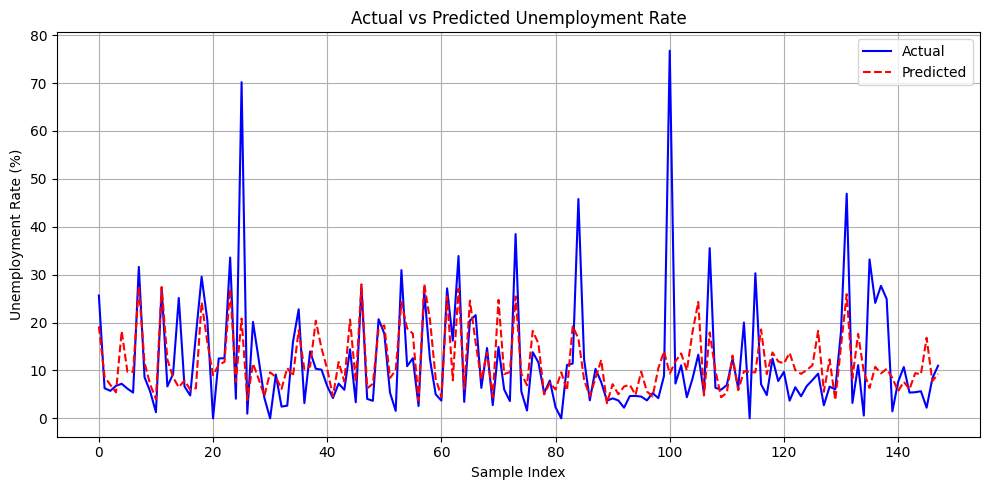

In [17]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='red', linestyle='--')
plt.title('Actual vs Predicted Unemployment Rate')
plt.xlabel('Sample Index')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

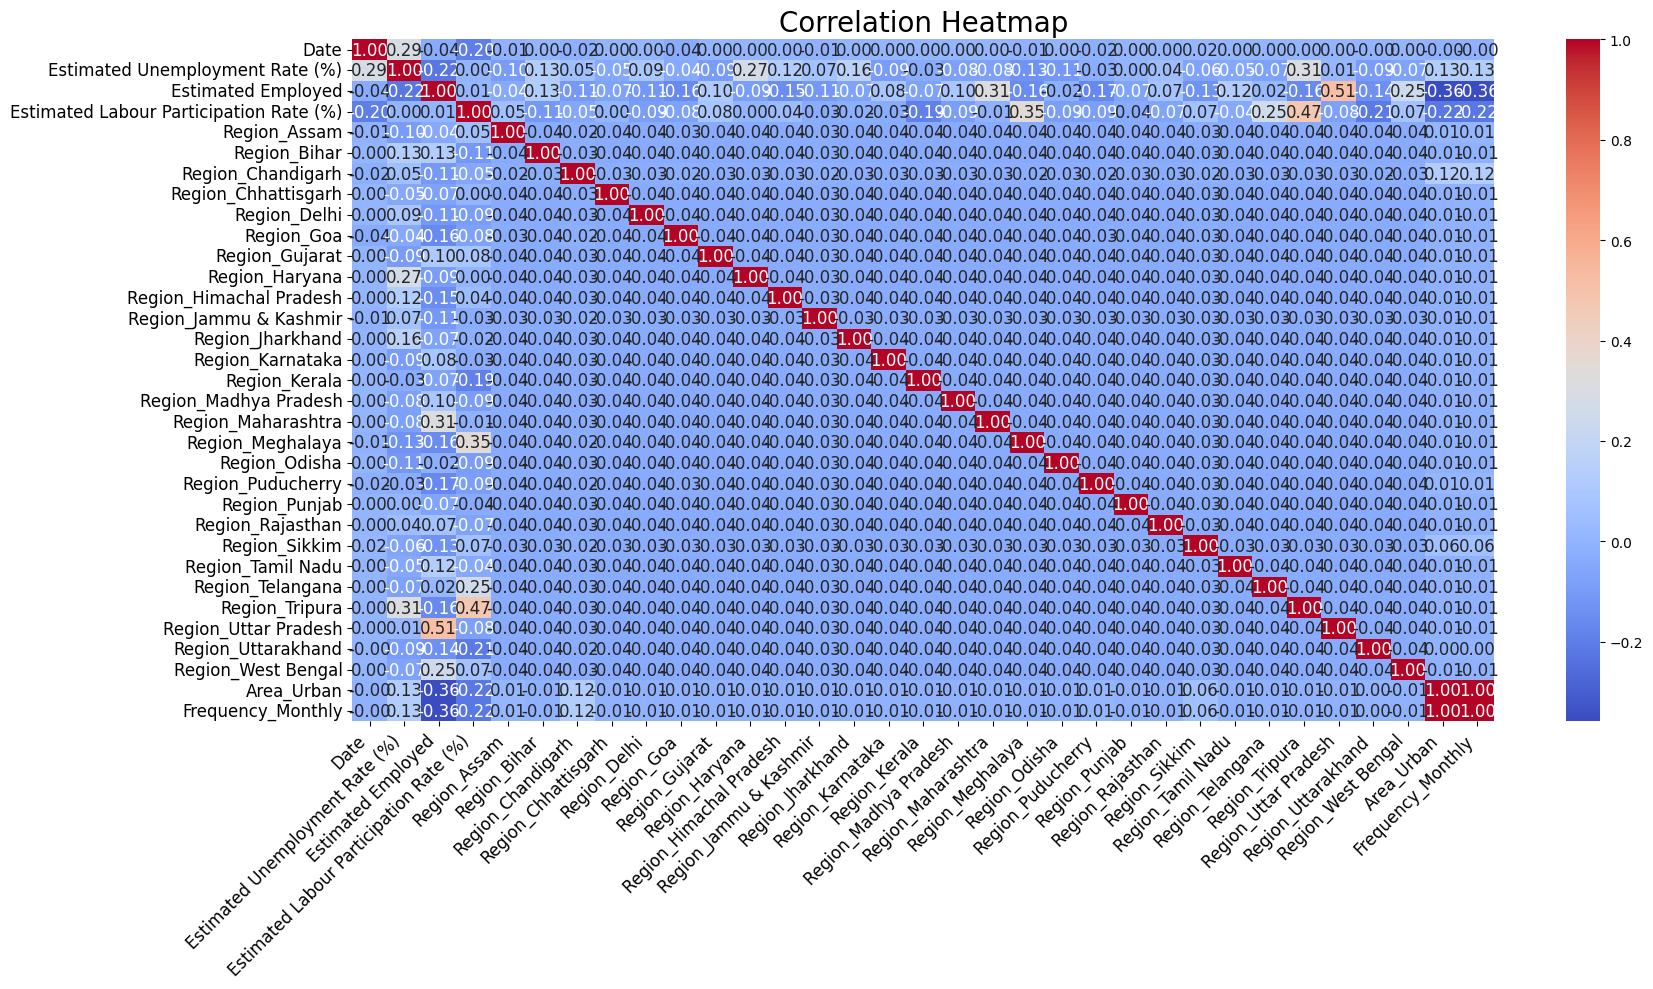

In [19]:
plt.figure(figsize=(18, 10))  # Increased figure size
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 12})
plt.title('Correlation Heatmap', fontsize=20)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()